# Deep learning 101
## MNSIT classification using Keras

In [0]:
# Install Kears if its not already there
#! pip install keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.utils import to_categorical
from keras.models import Model

Using TensorFlow backend.


Read MNIST data from Keras

In [3]:
from keras.datasets import mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()
print('Train image shape: ', trainImages.shape)
print('Train labels shape: ', trainLabels.shape)

Train image shape:  (60000, 28, 28)
Train labels shape:  (60000,)


Display an example image

Digit:  2


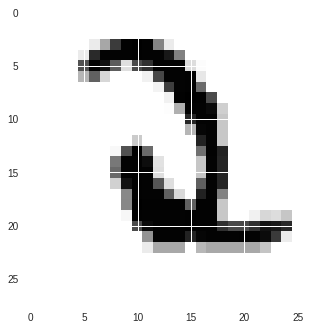

In [4]:
print('Digit: ', trainLabels[400])
plt.imshow(trainImages[400])
plt.show()

Reshape train and test images

In [5]:
trainImages = trainImages.reshape(trainImages.shape[0], trainImages.shape[1]*trainImages.shape[2])
trainImages = trainImages.astype(np.float32) / 255
testImages = testImages.reshape(testImages.shape[0], testImages.shape[1]*testImages.shape[2])
testImages = testImages.astype(np.float32) / 255
print('Train shape: ', trainImages.shape)
print('Test shape: ', testImages.shape)

Train shape:  (60000, 784)
Test shape:  (10000, 784)


Encode labels

In [6]:
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)
print(trainLabels[0])
print(testLabels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Build model
We will create a single layer with 512 units and connect that to a softmax activation.
<br>Use categorical crossentropy loss function
<br>Train the model using RMSProp 

In [0]:
X_input = Input(dtype=np.float32,shape=(28*28,))
Y = Dense(512, activation='relu')(X_input)
Y = Dense(10, activation='softmax')(Y)
model = Model(inputs = X_input, outputs = Y)

Train the model using RMSProp

In [0]:
from keras import optimizers, losses

In [9]:
model.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x=trainImages, y=trainLabels, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2550 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1039 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0698 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0500 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0379 - acc: 0.9888


Evaluate model

In [10]:
evel = model.evaluate(x=testImages, y=testLabels)

10000/10000 [==============================] - 1s 62us/step


In [11]:
print(evel)

[0.06416816953497473, 0.9807]
